In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

import plotly.express as px

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

import librosa
import librosa.display
import IPython.display as ipd

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_csv_1 = pd.read_csv("./train_csv_1_imputed.csv")
val_csv = pd.read_csv("./val_df_imputed.csv")

In [3]:
train_csv_1.head()

,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean,Realornot,Final_sex_Female,Final_sex_Male,Final_country_Argentina,Final_country_Chile,Final_country_Colombia,Final_country_Peru,Final_country_Venezuela
0,114.550520,25.626345,28.630450,0.458604,1.381651,23.938280,0.649579,11.692818,0.896338,13.226121,...,0.015036,0.020018,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,26.689714,24.284646,13.630733,0.334295,1.922428,13.940374,1.032208,13.390848,1.140205,10.643297,...,0.029346,0.023459,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,98.376000,21.694504,12.566723,0.468255,1.301961,19.693083,0.762561,6.794200,2.528780,9.388177,...,0.019788,0.019014,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,196.479260,24.284646,13.630733,0.651946,0.969091,26.304860,0.685982,10.949346,0.998904,10.903319,...,0.019064,0.012776,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,173.466080,27.026033,4.788605,0.958504,1.376758,14.628552,0.945577,10.889606,0.882619,12.746132,...,0.022304,0.019813,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [4]:
train_csv_1['Realornot'].value_counts()

Realornot
1    7151
0    7092
Name: count, dtype: int64

In [5]:
val_csv.head()

,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,jitterLocal_sma3nz_amean,slopeUV500-1500_sma3nz_amean,Realornot,Final_sex_Female,Final_sex_Male,Final_country_Argentina,Final_country_Chile,Final_country_Colombia,Final_country_Peru,Final_country_Venezuela
0,18.611395,25.438095,7.178744,0.399221,1.381376,17.244150,1.008665,13.780508,0.736732,17.198692,...,0.033509,0.023628,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,97.071350,22.172363,8.290317,0.685127,0.972903,17.999735,1.087042,8.188943,1.748665,6.679542,...,0.017606,0.036770,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,110.492480,31.489939,13.320490,0.894024,1.016733,23.242935,0.698181,5.515309,2.543695,13.372943,...,0.021711,0.015140,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,89.668910,14.798450,8.173624,0.367669,1.452846,16.818068,0.855015,8.805589,1.673958,6.660698,...,0.016420,0.025118,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1053.285800,24.000278,13.510465,0.444806,1.241398,20.081215,0.954065,11.105152,1.318291,17.346170,...,0.017368,0.015044,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## SECCIÓ 2
### 2.1 Normalització variables

NORMALITZAR AMB Z-SCORE STANDARD SCALER

In [6]:
from sklearn.preprocessing import StandardScaler

categoricas = [ 
    'Final_sex_Female',
    'Final_sex_Male', 
    'Final_country_Argentina', 
    'Final_country_Chile',
    'Final_country_Colombia', 
    'Final_country_Peru',
    'Final_country_Venezuela'
    
]
numeric_columns = train_csv_1.select_dtypes(include=['number']).columns.difference(['Realornot']).difference(categoricas)
numeric_columns1 = val_csv.select_dtypes(include=['number']).columns.difference(['Realornot']).difference(categoricas)
scaler = StandardScaler()

train_csv_1[numeric_columns] = scaler.fit_transform(train_csv_1[numeric_columns])
val_csv[numeric_columns] = scaler.transform(val_csv[numeric_columns1])
train_csv_1[numeric_columns].head()

,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,jitterLocal_sma3nz_amean,loudness_sma3_amean,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,slopeUV500-1500_sma3nz_amean,spectralFlux_sma3_stddevNorm
0,0.107470,0.516185,0.042162,-0.917808,0.043579,1.369694,-1.268885,0.453594,-0.654472,0.173033,-0.104623,-0.323757,0.033786
1,-0.014251,-0.281358,-0.625503,1.768527,-0.680925,-0.935681,0.556883,0.774971,-0.286594,-0.388259,0.691300,0.326065,1.634060
2,-0.249233,-0.337932,-0.080750,-0.025649,0.099827,0.390812,-0.729778,-0.473538,1.808096,-0.661018,2.208447,-0.513482,-0.202033
3,-0.014251,-0.281358,0.664748,-0.161668,1.170417,1.915393,-1.095184,0.312882,-0.499749,-0.331752,0.234389,-1.691592,-1.187065
4,0.234453,-0.751499,0.489868,0.446545,2.957100,-0.776997,0.143514,0.301575,-0.675166,0.068723,-0.367465,-0.362657,0.019306


In [7]:
val_csv[numeric_columns1].head()

,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,jitterLocal_sma3nz_amean,loudness_sma3_amean,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,slopeUV500-1500_sma3nz_amean,spectralFlux_sma3_stddevNorm
0,0.090392,-0.624414,-0.686891,2.549939,-0.302522,-0.173877,0.444548,0.848719,-0.895239,1.036342,-0.621899,0.358017,0.032971
1,-0.205881,-0.565311,-0.090664,-0.435326,1.363801,0.000350,0.818534,-0.209563,0.631278,-1.249652,2.296367,2.840071,-1.175787
2,0.639426,-0.297854,0.011324,0.335314,2.581300,1.209357,-1.036976,-0.715587,1.830595,0.204940,0.144744,-1.245168,-1.046083
3,-0.874856,-0.571515,-0.146917,-0.657961,-0.486410,-0.272126,-0.288619,-0.092855,0.518583,-1.253747,3.330319,0.639403,0.244469
4,-0.040049,-0.287753,7.175725,-0.479997,-0.036841,0.480309,0.184014,0.342370,-0.017947,1.068391,-0.559158,-1.263213,-0.381251


### 2.2 Anàlisi variables categòriques i varaible objectiu

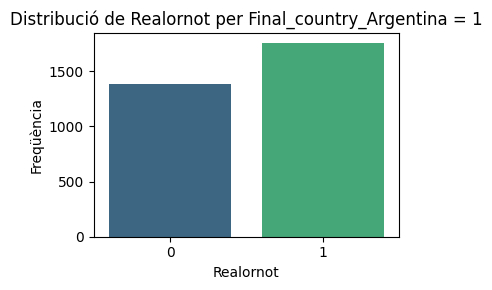

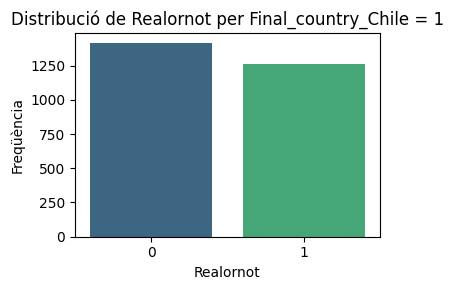

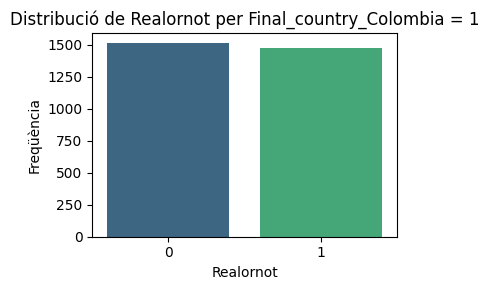

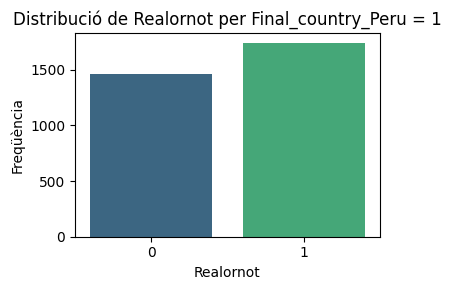

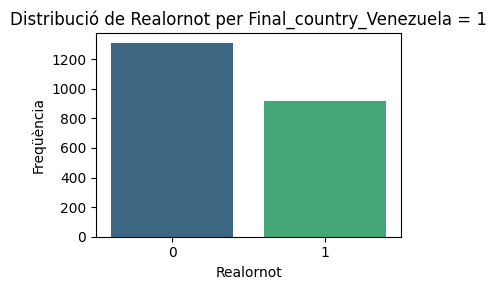

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categòriques amb one-hot encoding
categoricas = [  
    'Final_country_Argentina', 
    'Final_country_Chile',
    'Final_country_Colombia', 
    'Final_country_Peru',
    'Final_country_Venezuela'
]

for column in categoricas:
    plt.figure(figsize=(4, 3))
    
    filtered_data = train_csv_1[train_csv_1[column] == 1]
    
    sns.countplot(data=filtered_data, x='Realornot', palette='viridis')
    
    plt.title(f"Distribució de Realornot per {column} = 1")
    plt.xlabel("Realornot")
    plt.ylabel("Freqüència")
    plt.tight_layout()
    plt.show()


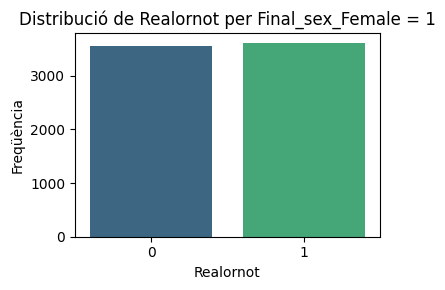

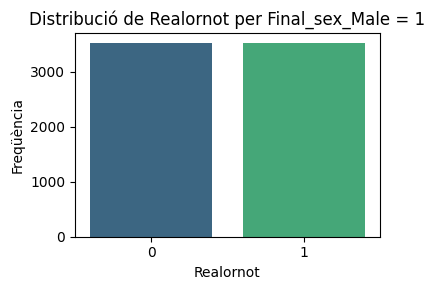

In [9]:
# Variables categòriques
categoricas = [  
    'Final_sex_Female',
    'Final_sex_Male',
]

for column in categoricas:
    plt.figure(figsize=(4, 3))
    
    filtered_data = train_csv_1[train_csv_1[column] == 1]
    
    sns.countplot(data=filtered_data, x='Realornot', palette='viridis')
    
    plt.title(f"Distribució de Realornot per {column} = 1")
    plt.xlabel("Realornot")
    plt.ylabel("Freqüència")
    plt.tight_layout()
    plt.show()


### 2.3 Eliminació de variables numèriques redundants o sorolloses fent servir la correlació i tenint en compte la tasca objectiu

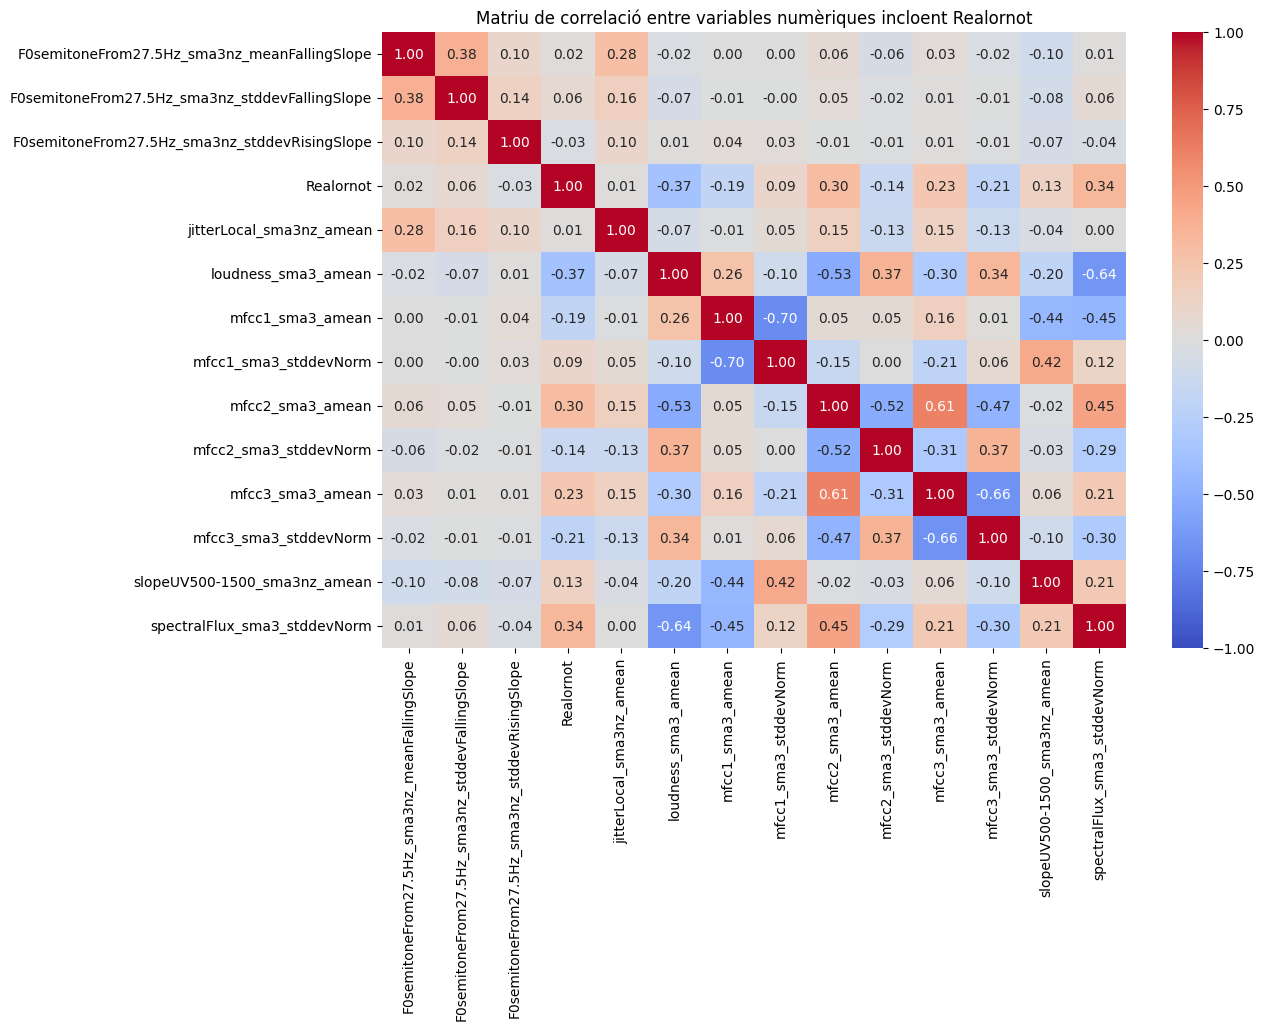

In [10]:
## MATRIU DE CORRELACIÓ
categoricas = [ 
    'Final_sex_Female',
    'Final_sex_Male', 
    'Final_country_Argentina', 
    'Final_country_Chile',
    'Final_country_Colombia', 
    'Final_country_Peru',
    'Final_country_Venezuela'
]
numeric_columns = train_csv_1.select_dtypes(include=['number']).columns.difference(categoricas)

# Matriu de correlació amb 'Realornot'
correlation_matrix = train_csv_1[numeric_columns].corr()

# Mostrar la matriu de correlació
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriu de correlació entre variables numèriques incloent Realornot')
plt.show()


In [11]:
# Identificar variables amb correlació alta
threshold = 0.8
high_corr_pairs = []

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if abs(correlation_matrix.loc[row, col]) > threshold and row != col:
            high_corr_pairs.append((row, col))

print("Parelles de variables amb correlació alta (> 0.8):")
print(high_corr_pairs)


Parelles de variables amb correlació alta (> 0.8):
[]


In [12]:
# Correlació amb la variable objectiu
target_corr = train_csv_1[numeric_columns].corrwith(train_csv_1['Realornot']).sort_values(ascending=False)

print("Correlació de cada variable amb Realornot:")
print(target_corr)


Correlació de cada variable amb Realornot:
Realornot                                         1.000000
spectralFlux_sma3_stddevNorm                      0.340297
mfcc2_sma3_amean                                  0.299721
mfcc3_sma3_amean                                  0.232966
slopeUV500-1500_sma3nz_amean                      0.134656
mfcc1_sma3_stddevNorm                             0.093813
F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope    0.062713
F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope      0.022092
jitterLocal_sma3nz_amean                          0.014829
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope    -0.031183
mfcc2_sma3_stddevNorm                            -0.143122
mfcc1_sma3_amean                                 -0.191197
mfcc3_sma3_stddevNorm                            -0.210893
loudness_sma3_amean                              -0.373365
dtype: float64


In [ ]:
# Eliminar variables amb correlació baixa amb Realornot
test_csv = pd.read_csv("./merged_test.csv")
low_corr_columns = target_corr[abs(target_corr) < 0.07].index

to_remove = set(low_corr_columns)

for var1, var2 in high_corr_pairs:
    if var1 not in to_remove:
        to_remove.add(var2)

print("Variables a eliminar:")
print(to_remove)

# Eliminar variables del dataset
train_csv_1.drop(columns=['F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'jitterLocal_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope'], inplace=True)
test_csv.drop(columns=['F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'jitterLocal_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope'], inplace=True)


Variables a eliminar:
{'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'jitterLocal_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope'}


In [14]:
val_csv.drop(columns=['F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'jitterLocal_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope'], inplace=True)


In [15]:
train_csv_1.columns

Index(['loudness_sma3_amean', 'spectralFlux_sma3_stddevNorm',
       'mfcc1_sma3_amean', 'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean',
       'mfcc2_sma3_stddevNorm', 'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm',
       'slopeUV500-1500_sma3nz_amean', 'Realornot', 'Final_sex_Female',
       'Final_sex_Male', 'Final_country_Argentina', 'Final_country_Chile',
       'Final_country_Colombia', 'Final_country_Peru',
       'Final_country_Venezuela'],
      dtype='object')

### 2.4 Estudi PCA

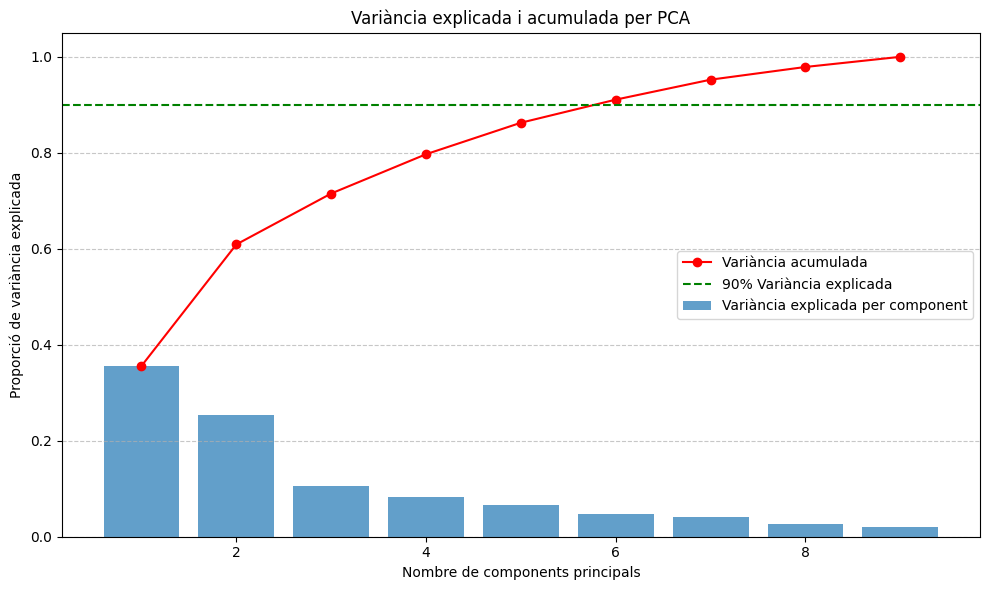

In [16]:
from sklearn.decomposition import PCA

categoricas = [ 
    'Final_sex_Female',
    'Final_sex_Male', 
    'Final_country_Argentina', 
    'Final_country_Chile',
    'Final_country_Colombia', 
    'Final_country_Peru',
    'Final_country_Venezuela'
]
numeric_columns = train_csv_1.select_dtypes(include=['number']).columns.difference(['Realornot']).difference(categoricas)

# Aplicar PCA
pca = PCA()
pca.fit(train_csv_1[numeric_columns])

explained_variance_ratio = pca.explained_variance_ratio_

# Variància explicada acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# gràfic de variància explicada
plt.figure(figsize=(10, 6))

plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Variància explicada per component')

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Variància acumulada')

plt.title('Variància explicada i acumulada per PCA')
plt.xlabel('Nombre de components principals')
plt.ylabel('Proporció de variància explicada')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% Variància explicada')  # Línia de referència al 90%
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [17]:
# Trobar el nombre de components necessaris per explicar el 90% de la variància
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Nombre de components necessaris per explicar el 90% de la variància: {n_components_90}")

Nombre de components necessaris per explicar el 90% de la variància: 6


<div class="alert alert-success">
Finalment NO es redueix dimensionalitat degut a que hi ha pocs features
</div>

In [18]:
val_csv.to_csv("val_df_imputed.csv", index=False)
train_csv_1.to_csv("train_csv_1_imputed.csv", index=False)
test_csv.to_csv("merged_test.csv", index=False)